# IMBD reviews em português para análise de sentimento usando nltk e sklearn

link dataset: https://www.kaggle.com/luisfredgs/imdb-ptbr#

## Contexto

- Este conjunto de dados tem reviews em portugues divididos em classes positivas e negativas para classificação de polaridade de sentimento.
- Este conjunto de dados é muito interessante, estamos lidando com a linguagem popular na internet.
- É necessário realizar alguns tratamentos mais cuidadosos, como remoção de ruído, redução de dimensionalidade, padronização de objetos e avaliação de alguns símbolos, se forem importantes para expressar algum sentimento.

## Dataset
* Reviews - 49459 
* classes - positivo e negativo
* Stopwords costumizados: stopwords-pt-br.txt

## Descrição das colunas
* id: (int) Identificador do reviews
* text_en: (string) Texto completo em inglês
* text_pt: (string) Texto completo em português
* sentiment: (string) Rótulo de sentimento (classificador)

## Conteúdo
* Carregar bibliotecas.
* Carregar conjunto de dados.
* Pré-processamento de texto.
* Análise exploratória em palavras.
* Bag-of-Words.
* Prepare o algoritmo e execute o modelo.
* Previsões autônomas.
* Avalie o modelo.
* Construindo um pipeline MultinomialNB.
* Avaliando modelo MultinomialNB.


- Web Crawler
    - Extraindo review de um filme na IMBD.
    - Traduzir dataset para português.
    - Fazer predições do dataset extraido.

## Carregar bibliotecas

In [1]:
import os
import pandas as pd
import numpy as np
import random
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.tokenize import wordpunct_tokenize
# from nltk.tokenize import sent_tokenize (Tokenization)
from nltk.probability import FreqDist
from nltk.metrics import ConfusionMatrix
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn import metrics

## Carregar conjunto de dados

### Carregar e preparar X_train, y_train

In [2]:
dataset = pd.read_csv('dataset/imdb-reviews-pt-br.csv')

### Análise Exploratória

In [3]:
dataset.sample(5)

id                                            text_en  \
41737  41739  There are very few performers today who can ke...   
26871  26873  My kid makes better videos than this! I feel r...   
47107  47109  Mary Pickford often stated that Tess Skinner w...   
2521    2523  This movie is very violent, yet exciting with ...   
31509  31511  Almost in the same league as Yonfans rather at...   

                                                 text_pt sentiment  
41737  Há muito poucos artistas hoje que podem me man...       pos  
26871  Meu filho faz vídeos melhores do que isso! Eu ...       neg  
47107  Mary Pickford muitas vezes afirmou que Tess Sk...       pos  
2521   Este filme é muito violento, mas emocionante c...       neg  
31509  Quase no mesmo patamar dos Yonfans, que são os...       neg

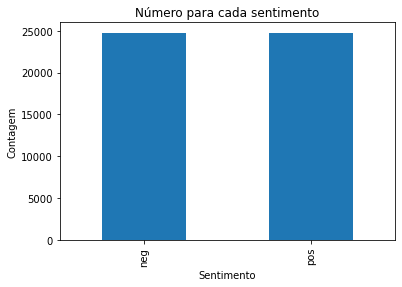

In [4]:
series = dataset['sentiment'].value_counts()
ax = series.plot(kind='bar', title='Número para cada sentimento')
ax.set_xlabel('Sentimento')
ax.set_ylabel('Contagem')
plt.show()

In [5]:
# verificar dados
for i in range(0, 5):
    print(dataset['text_pt'][i], ' => ', dataset['sentiment'][i])

Mais uma vez, o Sr. Costner arrumou um filme por muito mais tempo do que o necessário. Além das terríveis seqüências de resgate no mar, das quais há muito poucas, eu simplesmente não me importei com nenhum dos personagens. A maioria de nós tem fantasmas no armário, e o personagem Costers é realizado logo no início, e depois esquecido até muito mais tarde, quando eu não me importava. O personagem com o qual deveríamos nos importar é muito arrogante e superconfiante, Ashton Kutcher. O problema é que ele sai como um garoto que pensa que é melhor do que qualquer outra pessoa ao seu redor e não mostra sinais de um armário desordenado. Seu único obstáculo parece estar vencendo Costner. Finalmente, quando estamos bem além do meio do caminho, Costner nos conta sobre os fantasmas dos Kutchers. Somos informados de por que Kutcher é levado a ser o melhor sem pressentimentos ou presságios anteriores. Nenhuma mágica aqui, era tudo que eu podia fazer para não desligar uma hora.  =>  neg
Este é um ex

## Pré-Processamento
- Uma das etapas mais importantes do processo de aprendizado de máquinas é o pré-processamento. E isso não é diferente na análise de sentimentos.

- O pré-processamento de um texto consiste em transformar a base de dados original em um formato mais conveniente para o processamento computacional. Umas dessas etapas é a remoção de stopwords, que são palavras que não devem ser consideradas na análise, como “o”, “e”, “a”, “de”, “que”, “do”, etc. Essas palavras são eliminadas pois não apresentam informações relevantes para a construção do modelo analisado, apenas definem ou articulam ideias.

### Planejamento
- Tokenizar texto com nltk
    * Padronização de Objetos
    * Remova palavras de interrupção (remoção de ruído)
    * Normalização Lexicon
    * Stemming (redução de dimensionalidade)

### Tokenizar texto com nltk

In [6]:
def tokenize_text(data):
    ls = []

    for line in data:
        tokens = wordpunct_tokenize(line)
        ls.append(tokens)

    return ls

In [7]:
dataset_tokens = tokenize_text(dataset['text_pt'])

In [8]:
# checando dataset
for i in range(0, 5):
    print(dataset_tokens[i])

['Mais', 'uma', 'vez', ',', 'o', 'Sr', '.', 'Costner', 'arrumou', 'um', 'filme', 'por', 'muito', 'mais', 'tempo', 'do', 'que', 'o', 'necessário', '.', 'Além', 'das', 'terríveis', 'seqüências', 'de', 'resgate', 'no', 'mar', ',', 'das', 'quais', 'há', 'muito', 'poucas', ',', 'eu', 'simplesmente', 'não', 'me', 'importei', 'com', 'nenhum', 'dos', 'personagens', '.', 'A', 'maioria', 'de', 'nós', 'tem', 'fantasmas', 'no', 'armário', ',', 'e', 'o', 'personagem', 'Costers', 'é', 'realizado', 'logo', 'no', 'início', ',', 'e', 'depois', 'esquecido', 'até', 'muito', 'mais', 'tarde', ',', 'quando', 'eu', 'não', 'me', 'importava', '.', 'O', 'personagem', 'com', 'o', 'qual', 'deveríamos', 'nos', 'importar', 'é', 'muito', 'arrogante', 'e', 'superconfiante', ',', 'Ashton', 'Kutcher', '.', 'O', 'problema', 'é', 'que', 'ele', 'sai', 'como', 'um', 'garoto', 'que', 'pensa', 'que', 'é', 'melhor', 'do', 'que', 'qualquer', 'outra', 'pessoa', 'ao', 'seu', 'redor', 'e', 'não', 'mostra', 'sinais', 'de', 'um', '

### Remova palavras de interrupção (remoção de ruído)

### Remove stopwords

In [9]:
def remove_stopwords(tokens, stopword_list):
    ls = []

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            if word.lower() not in stopword_list:
                new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [11]:
# obter palavras irrelevantes em português
nltk.download('stopwords')
nltk_stopwords = nltk.corpus.stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to C:\Users\stefanini.STFBSB
[nltk_data]     C044671-L\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [12]:
nltk_stopwords[:10]

['de', 'a', 'o', 'que', 'e', 'é', 'do', 'da', 'em', 'um']

In [13]:
# Você também pode adicionar palavras irrelevantes manualmente em vez de carregar do banco de dados. Geralmente, adicionamos palavras irrelevantes que pertencem a este contexto.
nltk_stopwords.append('...')
nltk_stopwords.append('«')
nltk_stopwords.append('➔')
nltk_stopwords.append('|')
nltk_stopwords.append('»')
nltk_stopwords.append('uai') # Expressão dos  mineiros (MG/Brazil)'

In [14]:
dataset_tokens = remove_stopwords(dataset_tokens, nltk_stopwords)

In [15]:
# checando dataset
for i in range(0, 5):
    print(dataset_tokens[i])

['vez', ',', 'Sr', '.', 'Costner', 'arrumou', 'filme', 'tempo', 'necessário', '.', 'Além', 'terríveis', 'seqüências', 'resgate', 'mar', ',', 'quais', 'poucas', ',', 'simplesmente', 'importei', 'nenhum', 'personagens', '.', 'maioria', 'fantasmas', 'armário', ',', 'personagem', 'Costers', 'realizado', 'logo', 'início', ',', 'esquecido', 'tarde', ',', 'importava', '.', 'personagem', 'deveríamos', 'importar', 'arrogante', 'superconfiante', ',', 'Ashton', 'Kutcher', '.', 'problema', 'sai', 'garoto', 'pensa', 'melhor', 'qualquer', 'outra', 'pessoa', 'redor', 'mostra', 'sinais', 'armário', 'desordenado', '.', 'único', 'obstáculo', 'parece', 'estar', 'vencendo', 'Costner', '.', 'Finalmente', ',', 'bem', 'além', 'meio', 'caminho', ',', 'Costner', 'conta', 'sobre', 'fantasmas', 'Kutchers', '.', 'informados', 'Kutcher', 'levado', 'ser', 'melhor', 'pressentimentos', 'presságios', 'anteriores', '.', 'Nenhuma', 'mágica', 'aqui', ',', 'tudo', 'podia', 'fazer', 'desligar', 'hora', '.']
['exemplo', 'mo

## Stemming
- É a técnica que reduz um termo ao seu radical, removendo afixos e vogais temáticas. Um do seus objetivos é reduzir a quantidade de palavras na base de dados. A redução de vocabulário permite maior velocidade de processamento e menor número de erros causados por combinações não previstas.

Exemplos:

- *Frequentemente* se torna “Frequent”
- *Copiar* se torna “Copi”

In [16]:
nltk.download('rslp')

[nltk_data] Downloading package rslp to C:\Users\stefanini.STFBSBC0446
[nltk_data]     71-L\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping stemmers\rslp.zip.


True

In [17]:
def apply_stemmer(tokens):
    ls = []
    stemmer = nltk.stem.RSLPStemmer()

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            word = str(stemmer.stem(word))
            new_tokens.append(word) 
            
        ls.append(new_tokens)
        
    return ls

In [18]:
dataset_tokens = apply_stemmer(dataset_tokens)

In [20]:
# checando dataset
for i in range(0, 5):
    print(dataset_tokens[i])

['vez', ',', 'sr', '.', 'costn', 'arrum', 'film', 'temp', 'necess', '.', 'além', 'terr', 'seqü', 'resgat', 'mar', ',', 'qual', 'pouc', ',', 'simples', 'import', 'nenhum', 'person', '.', 'maior', 'fantasm', 'armári', ',', 'person', 'cost', 'realiz', 'log', 'iníci', ',', 'esquec', 'tard', ',', 'import', '.', 'person', 'dev', 'import', 'arrog', 'superconfi', ',', 'ashton', 'kutch', '.', 'problem', 'sai', 'garot', 'pens', 'melhor', 'qualqu', 'outr', 'pesso', 'redor', 'mostr', 'sinal', 'armári', 'desorden', '.', 'únic', 'obstácul', 'parec', 'est', 'venc', 'costn', '.', 'final', ',', 'bem', 'além', 'mei', 'caminh', ',', 'costn', 'cont', 'sobr', 'fantasm', 'kutch', '.', 'inform', 'kutch', 'lev', 'ser', 'melhor', 'pressent', 'pressági', 'anteri', '.', 'nenhum', 'mágic', 'aqu', ',', 'tud', 'pod', 'faz', 'deslig', 'hor', '.']
['exempl', 'motiv', 'maior', 'film', 'açã', 'mesm', '.', 'genér', 'chat', ',', 'nad', 'valh', 'pen', 'assist', 'aqu', '.', 'complet', 'desperdíci', 'talent', 'ice', '-', 't

## Análise exploratória em palavras

### Word Cloud

In [21]:
def _get_text_cloud(tokens):
    text = ''

    for tk_line in tokens:
        new_tokens = []
        
        for word in tk_line:
            text += word + ' '
        
    return text

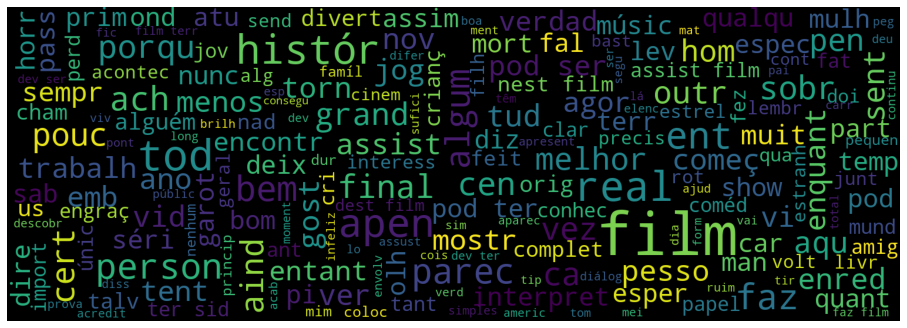

In [22]:
#WordCloud
sample_train = random.sample(dataset_tokens, 10000)
text_cloud = _get_text_cloud(sample_train)

word_cloud = WordCloud(max_font_size = 100, width = 1520, height = 535)
word_cloud.generate(text_cloud)
plt.figure(figsize = (16, 9))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

### Distribuição de frequência

In [23]:
def get_freq_dist_list(tokens):
    ls = []

    for tk_line in tokens:
        for word in tk_line:
            ls.append(word)

    return ls

In [24]:
# Distribuição de frequência no conjunto de dados
fd_list = get_freq_dist_list(dataset_tokens)
fdist = FreqDist(fd_list)
print(fdist)

<FreqDist with 69468 samples and 7517564 outcomes>


In [25]:
# palavras mais comuns
most_common = fdist.most_common(25)
print(most_common)

[(',', 611138), ('.', 530134), ('film', 192401), ('-', 97463), ('"', 95522), ('tod', 45616), ('pod', 43931), ('algum', 37807), ('faz', 37155), ('ser', 36779), ('real', 36548), ('sobr', 29509), ('outr', 28814), ('!', 28210), ('histór', 27586), ('?', 27481), ('parec', 26309), ('vez', 25548), ('person', 25273), ('tão', 25235), ('assist', 24984), ('apen', 23904), ('melhor', 23859), ('bem', 23329), ('cen', 23178)]


- Observação: observe que não adicionei palavras de interrupção manualmente [,. : - ('; ] previamente em "nltk_stopwords" propositalmente, para ver seus efeitos nesta sessão.

In [26]:
# palavras mais incomuns (palavras que aparecem uma vez)
most_uncommon = fdist.hapaxes()
print(most_uncommon[0:30])

['galien', 'yadayadayadaing', 'kamod', 'rendell', 'dousing', 'wanly', 'woddy', 'certainly', 'edr', 'sabj', 'kameej', 'salw', 'kame', 'kriy', 'dibak', 'banerje', 'tutul', 'dhruv', 'dhall', 'vasool', 'bedroomand', 'wilkinsom', 'relativist', 'buzzardbait', 'cowrot', 'thecast', 'abadr', 'cropsy', 'dgitw', 'buchel']


In [27]:
# encontre a palavra que ocorre no máximo de vezes
fdist.max()

','

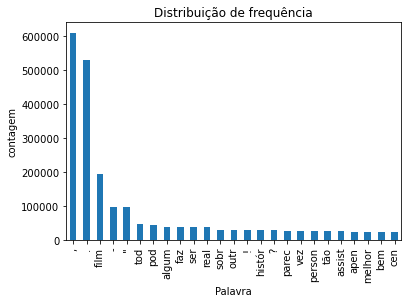

In [28]:
# grafico de palavras mais comuns
series = pd.Series(data=[v for k, v in most_common], index=[k for k, v in most_common], name='')
ax = series.plot(kind='bar', title='Distribuição de frequência')
ax.set_xlabel('Palavra')
ax.set_ylabel('contagem')
plt.show()

## Bag-of-Words
The bag-of-words model is one of the feature extraction algorithms for text.

## Preparação do conjunto de dados
Descompacte o texto (transforme o texto em token em uma lista de strings)

In [29]:
def untokenize_text(tokens):
    ls = []

    for tk_line in tokens:
        new_line = ''
        
        for word in tk_line:
            new_line += word + ' '
            
        ls.append(new_line)
        
    return ls

In [30]:
dataset_train = untokenize_text(dataset_tokens)

In [31]:
# check data
for i in range(0, 5):
    print(dataset_train[i])

vez , sr . costn arrum film temp necess . além terr seqü resgat mar , qual pouc , simples import nenhum person . maior fantasm armári , person cost realiz log iníci , esquec tard , import . person dev import arrog superconfi , ashton kutch . problem sai garot pens melhor qualqu outr pesso redor mostr sinal armári desorden . únic obstácul parec est venc costn . final , bem além mei caminh , costn cont sobr fantasm kutch . inform kutch lev ser melhor pressent pressági anteri . nenhum mágic aqu , tud pod faz deslig hor . 
exempl motiv maior film açã mesm . genér chat , nad valh pen assist aqu . complet desperdíci talent ice - t cub gel mal aproveit , cad comprov capaz atu agir bem . incomod , vá ver new jack city , ricochet assist new york undercov ice - t , boyz hood , high learning friday ice cub ver negóci real . ice - ts horri clich diálog so faz film ral dent , aind pergunt diab bill paxton faz nest film ? diab sempr interpret exat person ? extraterrestr di , tod film vi bill paxton 

## Texto para recursos
Extração de recurso do texto
Método: bag of words

In [32]:
# criar um objeto vetorizador de contagem
vectorizer = CountVectorizer()
dataset_train_vec = vectorizer.fit_transform(dataset_train)

In [33]:
print(dataset_train_vec.shape)

(49459, 68751)


## TF-IDF: Term Frequency - Inverse Document Frequency
- use o método transform (...) para transformar a matriz de contagem em uma representação tf-idf.

- O valor tf–idf (abreviação do inglês term frequency–inverse document frequency, que significa frequência do termo–inverso da frequência nos documentos), é uma medida estatística que tem o intuito de indicar a importância de uma palavra de um documento em relação a uma coleção de documentos ou em um corpus linguístico.

In [34]:
tfidf_transformer = TfidfTransformer()
dataset_train_tfidf = tfidf_transformer.fit_transform(dataset_train_vec)

In [35]:
print(dataset_train_tfidf.shape)

(49459, 68751)


## Preparar o algoritmo e executar o modelo
- Treinando um classificador - MultinomialNB

- Uma das formas mais antigas para tratar desse problema é por meio do algoritmo de Naive Bayes, um classificador probabilístico simples que parte da premissa que há independência entre as características (features) de um modelo. Ou seja, ele recebe o nome de “naive” (ingênuo) porque desconsidera a correlação entre as variáveis.

- Exemplo: na frase “Eu amo meus pais, mas hoje o dia está horrível” o classificador assume que as palavras dessa frase não dependem umas das outras. Sendo assim, a polaridade de uma sentença pode ser positiva caso a maioria das palavras tenham uma probabilidade maior de serem positivas.

In [41]:
X = dataset_train_tfidf
y = dataset['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=100)

In [42]:
model = MultinomialNB()
model.fit(X_train,y_train)

MultinomialNB()

In [43]:
predictions = model.predict(X_test)

In [44]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[6532  910]
 [1212 6184]]


              precision    recall  f1-score   support

         neg       0.84      0.88      0.86      7442
         pos       0.87      0.84      0.85      7396

    accuracy                           0.86     14838
   macro avg       0.86      0.86      0.86     14838
weighted avg       0.86      0.86      0.86     14838



### Novos documentos para prever

In [57]:
new_corpus = [
        'filme estranho... mas achei bom', 
        'nao gostei do filme achei bem ruim',
        'normal achei bem previsivel',
        'excelente filme recomendo assistir'
        ]

### Pré-processamento

In [58]:
X_new = new_corpus

In [59]:
X_new_tokens = tokenize_text(X_new)

In [60]:
# remover stopwords
X_new_tokens = remove_stopwords(X_new_tokens, nltk_stopwords)

In [61]:
# Stemming (dimensionality reduction)
X_new_tokens = apply_stemmer(X_new_tokens)

### Bag-of-Words

In [62]:
# Descompacte o texto (transforme o texto em token em uma lista de strings)
X_new = untokenize_text(X_new_tokens)

In [63]:
# bag of words
X_new_vect = vectorizer.transform(X_new)

In [64]:
print(X_new_vect.shape)

(4, 68751)


In [65]:
# TF-IDF:
X_new_tfidf = tfidf_transformer.transform(X_new_vect)

In [66]:
print(X_new_tfidf.shape)

(4, 68751)


### Faça previsões em new_corpus

In [67]:
predictions = model.predict(X_new_tfidf)

In [68]:
for doc, prediction in zip(new_corpus, predictions):
    print('%r => %s' % (doc, prediction))

'filme estranho... mas achei bom' => pos
'nao gostei do filme achei bem ruim' => neg
'normal achei bem previsivel' => neg
'excelente filme recomendo assistir' => pos


## Iremos extrair alguns reviews do site IMDB e cria um dataset em inglês e depois criaremos um novo dataset em português.

## Web Crawler
- Web crawler é um programa que colhe conteúdo na web de forma sistematizada através do protocolo padrão da web (http/https)
- Uma alternativaa para coletar as informações disponíveis na web (notícias, fórum, comentários, etc)

### Criando um Web Crawler
 - Iremos extrair os reviews de um filme chamado "October Sky" e iremos prever o que estão falando sobre este filme

In [72]:
import pandas as pd
import requests
from urllib.parse import urljoin
from bs4 import BeautifulSoup

url = 'https://www.imdb.com/title/tt0132477/reviews?ref_=tt_ql_3'
res = requests.get(url)
soup = BeautifulSoup(res.text,"lxml")

main_content = urljoin(url,soup.select(".load-more-data")[0]['data-ajaxurl'])
response = requests.get(main_content)
broth = BeautifulSoup(response.text,"lxml")

json = {"title": [], "review": []}

for item in broth.select(".review-container"):
    title = item.select(".title")[0].text.strip()
    review = item.select(".text")[0].text.strip()
    json['title'].append(title)
    json['review'].append(review)
    
df_en = pd.DataFrame(json)

### Dataset extraido em inglês

In [73]:
df_en.head(10)

title  \
0                 A film that hits close to home....   
1                                           Loved it   
2                                      Inspirational   
3                      I've Been There and It's Real   
4          Takes One Back To A Childhood In The '50s   
5           Excellent family movie, and a fine story   
6            Nostalgic, Inspirational and Worthwhile   
7  Superb film, based on real people and real eve...   
8         A real piece of Americana, not for cynics!   
9                            Rocket Boy's Life Soars   

                                              review  
0  "October Sky" is a film that will steal your h...  
1  1.) This movie was amazing! I watched it while...  
2  I loved this movie. It is one of the few movie...  
3  I have yet to read "The Rocket Boys", the book...  
4  This is a fine drama and a nice change of pace...  
5  I first saw Jake Gyllenhaal in Jarhead (2005) ...  
6  I was watching this when my wife called to inq...  
7  It was 1957 and Russia had just launched Sputn...  
8  This is a gem, a real piece of Americana for a...  
9  I resisted seeing this movie and I understand ...

## Traduzindo o dataset
 - Iremos utilizar a biblioteca Googletrans 
 - Googletrans é uma biblioteca python gratuita que usa a API do Google Translate.

In [77]:
# importar as bibliotecas
import googletrans
from googletrans import Translator

translator = Translator()

In [78]:
# Criando copia do dataframe
df_pt = df_en.copy()

# traduzindo as colunas
df_pt.rename(columns=lambda x: translator.translate(x, dest='pt').text, inplace=True)

# print das colunas traduzidas
df_pt.columns

Index(['título', 'Reveja'], dtype='object')

### Criando novo dataset traduzido
 - Depois de traduzir os nomes das colunas, traduzimos o resto dos dados (valores das células). Primeiro, criamos um dicionário onde as chaves são os termos em inglês e os valores são os termos originais em português.

In [82]:
translations = {}
for column in df_pt.columns:
    # unique elements of the column
    unique_elements = df_pt[column].unique()
    for element in unique_elements:
        # add translation to the dictionary
        translations[element] = translator.translate(element, dest='pt').text

In [86]:
# gerando novo dataset
df_pt.replace(translations, inplace = True)

# check translation
df_pt.head(10)

título  \
0              Um filme que chega perto de casa ....   
1                                               Amei   
2                                         Inspirador   
3                              Eu estive lá e é real   
4                       Volta à infância nos anos 50   
5     Excelente filme de família e uma bela história   
6              Nostálgico, inspirador e interessante   
7  Filme excelente, baseado em pessoas e eventos ...   
8  Um verdadeiro pedaço de Americana, não para cí...   
9                   A vida do menino foguete dispara   

                                              Reveja  
0  "October Sky" é um filme que vai roubar seu co...  
1  1.) Este filme foi incrível! Eu assisti enquan...  
2  Eu amei esse filme. É um dos poucos filmes que...  
3  Ainda não li "The Rocket Boys", o livro em que...  
4  Este é um belo drama e uma boa mudança de ritm...  
5  Eu vi Jake Gyllenhaal pela primeira vez em Jar...  
6  Eu estava assistindo a isso quando minha espos...  
7  Era 1957 e a Rússia acabara de lançar o Sputni...  
8  Esta é uma joia, um verdadeiro pedaço de Ameri...  
9  Resisti a ver esse filme e entendo por que não...

In [96]:
new_corpus = df_pt['Reveja'].array
X_new = new_corpus

In [97]:
X_new[:2]

<PandasArray>
['"October Sky" é um filme que vai roubar seu coração, encher sua mente com imagens vívidas e elevar seu espírito. A história de Homer Hickham e seu sonho de criar um foguete parecem tão simples no início, especialmente quando o filme se passa em uma cidade mineira, onde o futuro é tão claro quanto os pedaços de carvão na mina. Mas Homer não consegue seguir os passos do pai. Com o incentivo da Srta. Riley (uma professora amigável), membros da equipe de seu pai e seus amigos, Homer tenta tornar seu sonho realidade. No entanto, como em qualquer história real, há muitas paradas ao longo do caminho. O diretor Joe Johnston nos leva até as minas de carvão, onde testemunhamos a terrível situação dos mineiros encurralados sob um teto de rocha. Com capacetes acesos e postura curvada, eles pareciam insetoides alienígenas mais do que humanos na escuridão. A tosse seca dos mineiros e os rostos enegrecidos eram um lembrete constante do perigo que os mineiros enfrentavam em seu trabalh

In [98]:
X_new_tokens = tokenize_text(X_new)

In [99]:
# remover stopwords
X_new_tokens = remove_stopwords(X_new_tokens, nltk_stopwords)

In [100]:
# Stemming (dimensionality reduction)
X_new_tokens = apply_stemmer(X_new_tokens)

In [101]:
# Descompacte o texto (transforme o texto em token em uma lista de strings)
X_new = untokenize_text(X_new_tokens)

In [102]:
# bag of words
X_new_vect = vectorizer.transform(X_new)

In [103]:
# TF-IDF:
X_new_tfidf = tfidf_transformer.transform(X_new_vect)

In [104]:
predictions = model.predict(X_new_tfidf)

In [ ]:
## Criando dataset das Previsões

In [112]:
predict_crawler = {"review": [], "predicao": []}

In [113]:
for doc, prediction in zip(new_corpus, predictions):
    predict_crawler['review'].append(doc)
    predict_crawler['predicao'].append(prediction)

In [114]:
predict_crawler = pd.DataFrame(predict_crawler)

In [115]:
predict_crawler

review predicao
0   "October Sky" é um filme que vai roubar seu co...      pos
1   1.) Este filme foi incrível! Eu assisti enquan...      pos
2   Eu amei esse filme. É um dos poucos filmes que...      pos
3   Ainda não li "The Rocket Boys", o livro em que...      pos
4   Este é um belo drama e uma boa mudança de ritm...      pos
5   Eu vi Jake Gyllenhaal pela primeira vez em Jar...      pos
6   Eu estava assistindo a isso quando minha espos...      pos
7   Era 1957 e a Rússia acabara de lançar o Sputni...      pos
8   Esta é uma joia, um verdadeiro pedaço de Ameri...      pos
9   Resisti a ver esse filme e entendo por que não...      pos
10  Há um velho ditado que diz respeito ao novo fi...      pos
11  Um filme simples e eficaz sobre o que é a vida...      pos
12  Recentemente, vi esse filme devido ao recente ...      pos
13  Clássico absoluto. Me fez rir e me fez chorar....      pos
14  Há uma pequena curiosidade que deve ser aponta...      pos
15  Eu simplesmente tropecei acidentalmente neste ...      pos
16  Votei em 10 porque é meu filme mais amado de t...      pos
17  Este filme foi incrivelmente bem feito e pensa...      pos
18  Quando vi a premissa pela primeira vez, pensei...      pos
19  Em uma pequena cidade onde o bairro é feito de...      pos
20  OUTUBRO SKY é um ótimo filme. Eu consideraria ...      pos
21  Acho que li isso em algum lugar: Joe Johnston ...      pos
22  October Sky é um dos filmes mais comuns da mem...      pos
23  Uma verdadeira história americana saudável sob...      pos